# Mass Functions

## Microlensing Mass-Ratio Function

"uniform in log space"

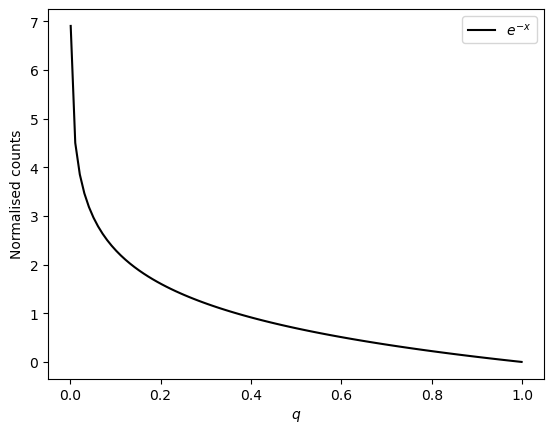

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
x = np.linspace(0.001,0.999,100)
plt.plot(x,-np.log(x),'k-',label=r'$e^{-x}$')
plt.xlabel(r'$q$')
plt.ylabel('Normalised counts')
plt.legend()
plt.show()

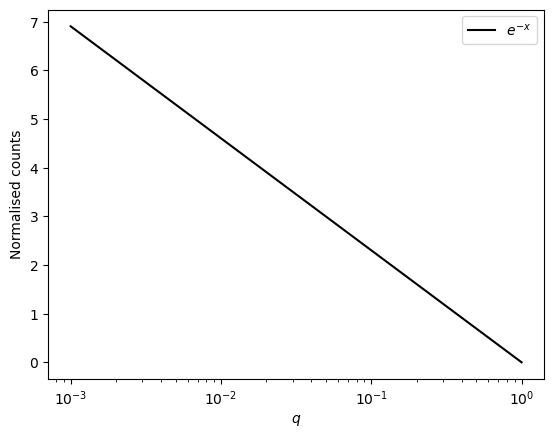

In [14]:
plt.figure()
x = np.linspace(0.001,1.0,1000)
plt.plot(x,-np.log(x),'k-',label=r'$e^{-x}$')
plt.xlabel(r'$q$')
plt.ylabel('Normalised counts')
plt.xscale('log')
plt.legend()
plt.show()

## Chabrier 2005 on MMRs
Apart from binaries of which the mass can be determined eventually by use of Kepler’s third law, the determination of the MF relies on the transformation of the observed luminosity function (LF), $\Phi = dN/dM$, i.e. the number of stars N per absolute magnitude interval dM. This transformation involves the derivative of a mass-luminosity relationship, for a given age τ , or preferentially of a mass-magnitude relationship (MMR), 
$$\frac{dn}{dm}(m)_\tau = (\frac{dn}{dM_\lambda(m)}) \times (\frac{dm}{dM_\lambda(m)})^{-1}_{\tau},$$
which applies directly in the observed magnitude Mλ and avoids the use of often ill-determined bolometric and Teff-color corrections. Figure 1 displays the comparison of the Andersen (1991) and Segransan et al. (2003) data in the V band with different theoretical MMRs, namely the parametrizations of Kroupa, Tout & Gilmore (1993) (KTG), Reid et al. (2002) for MV < 9 complemented by Delfosse et al. (2000) above this limit and the models of Baraffe et al. (1998) (BCAH) for two isochrones.

The KTG MMR gives an excellent parametrization of the data over the entire sample but fails to reproduce the flattening of the MMR near the low-mass end, which arises from the onset of degeneracy near the bottom
of the main sequence (MS), yielding too steep a slope. The Delfosse et al. (2000) parametrization, by construction, reproduces the data in the $M_V=9-17$ range. For $M_V < 9$, however, the parametrization of Reid et al. (2002) misses a few data, but more importantly does not yield the correct magnitude of the Sun for its age. The BCAH models give an
excellent representation for $m >∼ 0.4 \,M_\odot$. Age effects due to stellar evolution start playing a role above $m \sim 0.8 \,M_\odot$, where the bulk of the data is best reproduced for an age 1 Gyr, which is consistent with a stellar population belonging to the young disk ($h < 100 \,{\rm pc}$). Below $m \sim 0.4 \,M_\odot$, the BCAH MMR clearly differs from the Delfosse et al. (2000) one. Since we know that the BCAH models overestimate the flux in the Vband, due to still incomplete molecular opacities, we use the Delfosse et al. (2000) parametrization in this domain. The difference yields a maximum $\sim 16\%$ discrepancy in the mass determination near $M_V \sim 13$. Overall, the general agreement can be considered as very good, and the inferred error in the derived MF is smaller than the observational error bars in the LF. The striking result is the amazing agreement between the theoretical predictions and the data in the K-band (Figure 2), a more appropriate band for low-mass star (LMS) detections.

In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

parcticed using the archive search to get the following ADQL querry:

``` sql
SELECT TOP 10 source_id, parallax, bp_rp, phot_g_mean_flux, phot_g_mean_flux_error, phot_g_mean_mag, phot_bp_mean_flux, phot_bp_mean_flux_error, phot_bp_mean_mag, phot_rp_mean_flux, phot_rp_mean_flux_error, phot_rp_mean_mag 
FROM gaiadr3.gaia_source WHERE parallax > 100.0 ORDER BY parallax DESC;
```

In [7]:
# Test Job
job = Gaia.launch_job_async("SELECT TOP 10 * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT(gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE(56.75,24.1167,2))=1;" \
                            , dump_to_file=True)

print (job)

r = job.get_results()
print (r['source_id'])

Jobid: 1707347616461O
Phase: COMPLETED
Owner: None
Output file: 1707347616461O-result.vot.gz
Results: None
    source_id    
-----------------
66926207631181184
66818318054203520
66917823855519360
66830859358837888
66809423175240448
66944761890240000
66980191076373760
66781621852927232
66827805636652928
66947545031024640


In [389]:
# Test Job
job = Gaia.launch_job_async("SELECT * \
                            FROM gaiadr3.gaia_source \
                            WHERE parallax > 50.0 \
                            ORDER BY parallax DESC;" \
                            , dump_to_file=True)

# 100 mas -> 10 pc -> 32.615 ly

print (job)
r = job.get_results()
print (r)  # N = 315


Jobid: 1707364653309O
Phase: COMPLETED
Owner: None
Output file: 1707364653309O-result.vot.gz
Results: None
    solution_id             DESIGNATION          ... libname_gspphot
                                                 ...                
------------------- ---------------------------- ... ---------------
1636148068921376768 Gaia DR3 5853498713190525696 ...           MARCS
1636148068921376768 Gaia DR3 4472832130942575872 ...           MARCS
1636148068921376768 Gaia DR3 3864972938605115520 ...                
1636148068921376768  Gaia DR3 762815470562110464 ...           MARCS
1636148068921376768 Gaia DR3 2947050466531873024 ...                
1636148068921376768 Gaia DR3 5140693571158946048 ...                
1636148068921376768 Gaia DR3 5140693571158739840 ...                
1636148068921376768 Gaia DR3 4075141768785646848 ...           MARCS
1636148068921376768 Gaia DR3 1926461164913660160 ...                
1636148068921376768 Gaia DR3 5164707970261890560 ...           MA

In [141]:
job = Gaia.launch_job_async("SELECT * \
                            FROM gaiadr3.gaia_source \
                            WHERE distance_gspphot < 30.0 \
                            ORDER BY parallax DESC;" \
                            , dump_to_file=True)
print (job)
p = job.get_results()
print (p)  # N = 257

Jobid: 1707354964465O
Phase: COMPLETED
Owner: None
Output file: 1707354964465O-result.vot.gz
Results: None
    solution_id             DESIGNATION          ... libname_gspphot
                                                 ...                
------------------- ---------------------------- ... ---------------
1636148068921376768 Gaia DR3 5853498713190525696 ...           MARCS
1636148068921376768 Gaia DR3 4472832130942575872 ...           MARCS
1636148068921376768  Gaia DR3 762815470562110464 ...           MARCS
1636148068921376768 Gaia DR3 4075141768785646848 ...           MARCS
1636148068921376768 Gaia DR3 5164707970261890560 ...           MARCS
1636148068921376768 Gaia DR3 6553614253923452800 ...         PHOENIX
1636148068921376768 Gaia DR3 3796072592206250624 ...           MARCS
1636148068921376768 Gaia DR3 1872046574983497216 ...         PHOENIX
1636148068921376768 Gaia DR3 1872046609345556480 ...           MARCS
1636148068921376768 Gaia DR3 2154880616774131840 ...           MA

In [142]:
print(len(p['distance_gspphot']))
print(len(p['phot_g_mean_mag']))
#print(100./p['parallax'])


3826
3826


In [143]:
#absolute magnitude

def d_mod(d,M):
    '''Distance modulus.
    Formulua:
    m-M=-5+5log10(d)
    m: apparant magnitude
    M: absolute magnitude
    d: distance in pc'''
    return M+5.-5.*np.log10(d)

abs_g_mag = d_mod(np.array(p['distance_gspphot']),np.array(p['phot_g_mean_mag']))
abs_bp_mag = d_mod(np.array(p['distance_gspphot']),np.array(p['phot_bp_mean_mag']))
abs_rp_mag = d_mod(np.array(p['distance_gspphot']),np.array(p['phot_rp_mean_mag']))
print(abs_g_mag, abs_bp_mag, abs_rp_mag)

p.add_column(abs_g_mag, name='abs_g_mag') # Add column of all 1.0 to end of Table
p.add_column(abs_bp_mag, name='abs_bp_mag')
p.add_column(abs_rp_mag, name='abs_rp_mag')

[13.413196  11.884687   9.522477  ...  8.898813   2.0465927  1.3203444] [15.801562  13.482501  10.662427  ... 10.068037   2.2352133  1.4916892] [11.996982  10.648805   8.446818  ...  7.75465    1.7713614  1.1417975]


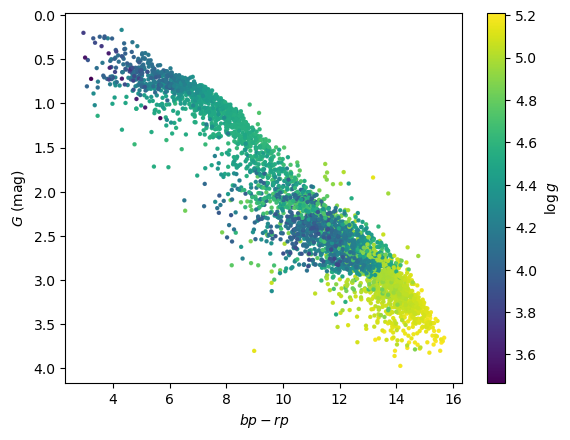

In [148]:
plt.figure()
scatter = plt.scatter(p['phot_g_mean_mag'], p['bp_rp'], c=p['logg_gspphot'], marker='.', linewidths=0.1)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'$\log g$')
plt.show()

In [63]:
print(r.colnames) 
#classprob_dsc_combmod_star
#distance_gspphot
#logg_gspphot

['solution_id', 'DESIGNATION', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr', 'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr', 'astrometric_matched_transits', 'visibility_periods_used', 'astrometric_sigma5d_max', 'matched_transits', 'new_matched_transits', 

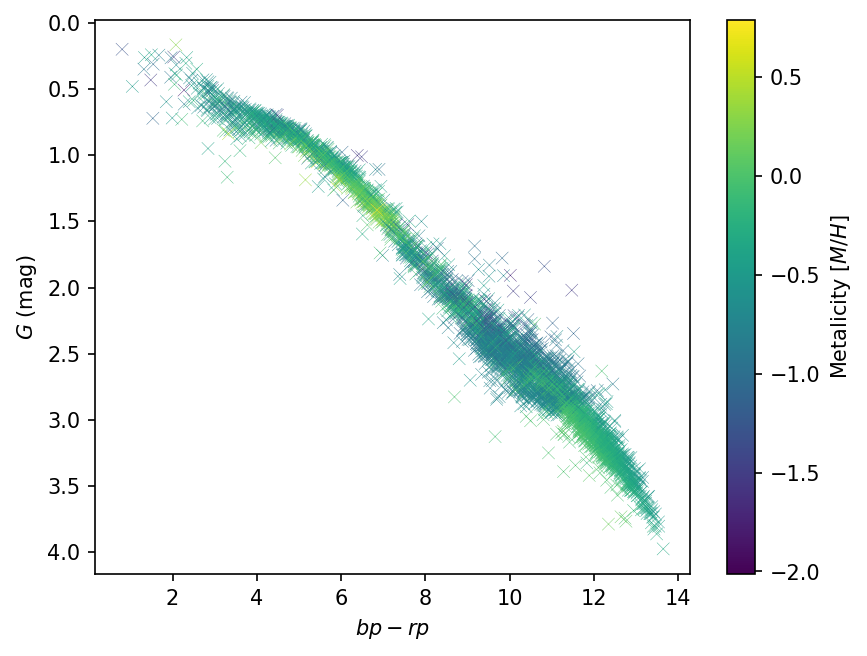

In [275]:
plt.figure(dpi=150)
scatter = plt.scatter(p['abs_g_mag'], p['bp_rp'], c=p['mh_gspphot'], marker='x', linewidths=0.2)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'Metalicity $[M/H]$')
plt.show()

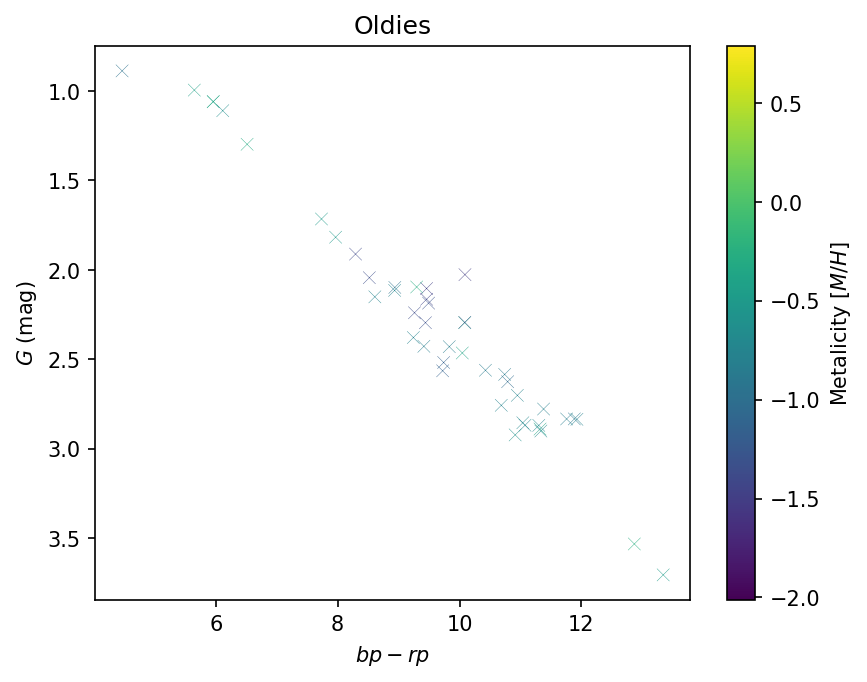

0.7886


In [348]:
# Age cut

#t['a'][np.where(t['a'] > 3)] = 8.

#cut = 0.
#points = np.where(((5.0-p['logg_gspphot'])*p['abs_g_mag']*p['bp_rp'])<cut)
cut = -0.25
dcut = 7.5
points = np.where((p['mh_gspphot']<cut) & (p['distance_gspphot']<dcut))

plt.figure(dpi=150)
scatter = plt.scatter(p['abs_g_mag'][points], p['bp_rp'][points], c=p['mh_gspphot'][points], marker='x', linewidths=0.2)
ax = scatter.axes
ax.invert_yaxis()
plt.title('Oldies')
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'Metalicity $[M/H]$')
plt.clim(min(p['mh_gspphot']),max(p['mh_gspphot']))
plt.show()
print(max(p['mh_gspphot']))

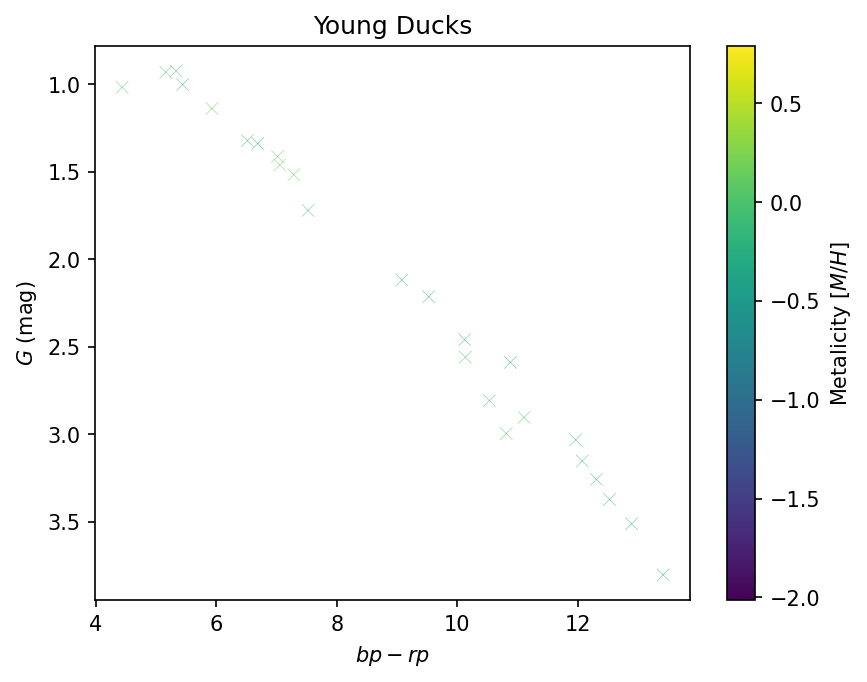

In [347]:
# Age cut

points = np.where((p['mh_gspphot']>cut) & (p['distance_gspphot']<8.))

plt.figure(dpi=150)
scatter = plt.scatter(p['abs_g_mag'][points], p['bp_rp'][points], c=p['mh_gspphot'][points], marker='x', linewidths=0.2)
ax = scatter.axes
ax.invert_yaxis()
plt.title('Young Ducks')
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'Metalicity $[M/H]$')
plt.clim(min(p['mh_gspphot']),max(p['mh_gspphot']))
plt.show()

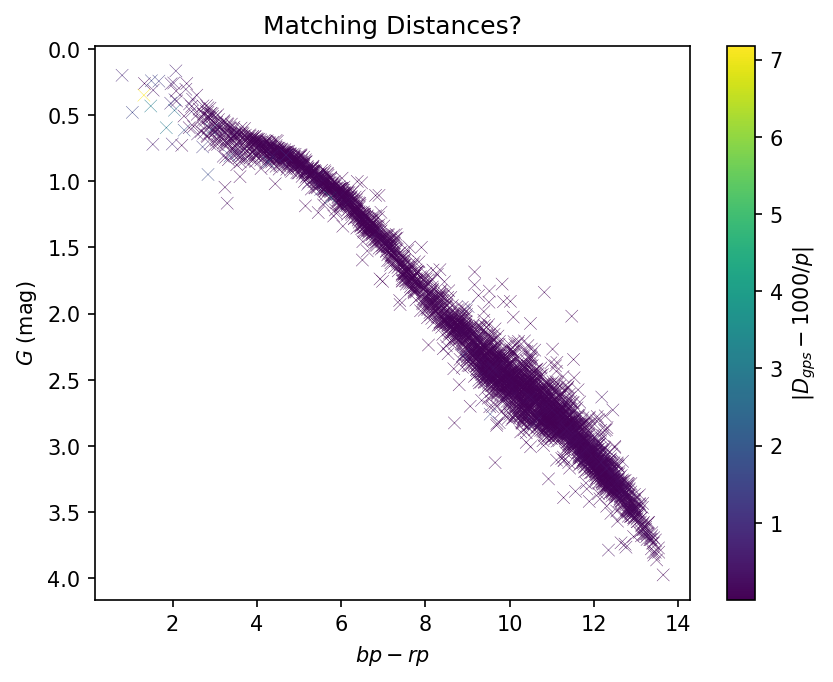

     parallax     
       mas        
------------------
 768.0665391873573
  546.975939730948
392.75294543876464
 336.0266016683708
 310.5772928005821
 304.1353692001036
 296.3053079139394
 286.0053518616485
285.99494829578117
 283.8401180184389
               ...
 33.15498796625269
 33.15250853423182
 33.13126261538538
 33.11568003393031
 33.10111442601867
 33.08689648785672
33.082394455607464
 32.27635301223176
  32.1200261538732
27.925632182460006
Length = 3826 rows 1.3019705311704333 35.80939523467965


In [334]:
# validating gdpphot

plt.figure(dpi=150)
scatter = plt.scatter(p['abs_g_mag'], p['bp_rp'], c=np.abs(p['distance_gspphot']-1000/p['parallax']), marker='x', linewidths=0.2)
ax = scatter.axes
ax.invert_yaxis()
plt.title('Matching Distances?')
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'$|D_{gps}-1000/p|$')
#plt.clim(min(p['mh_gspphot']),max(p['mh_gspphot']))
plt.show()

print(p['parallax'], (1000/p['parallax'])[0], (1000/p['parallax'])[-1])

## MMR

$$\frac{dn}{dm}(m)_\tau = (\frac{dn}{dM_\lambda(m)}) \times (\frac{dm}{dM_\lambda(m)})^{-1}_{\tau},$$

In [350]:
def MMR():
    dndm_M_T = dn

SyntaxError: incomplete input (3321099838.py, line 1)

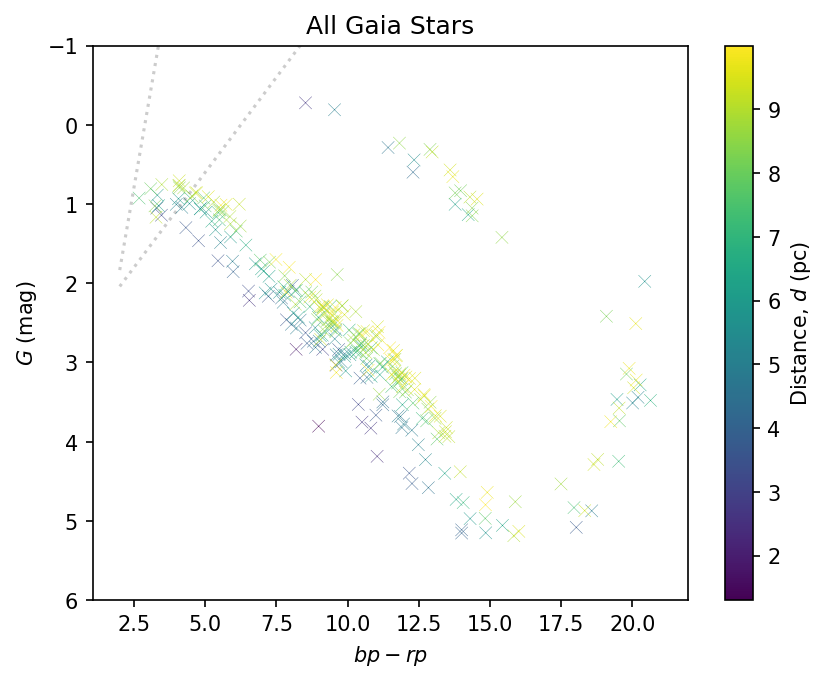

In [387]:
# 100 mas -> 10 pc -> 32.615 ly
plt.figure(dpi=150)
scatter = plt.scatter(r['phot_g_mean_mag'], r['bp_rp'], c=1000./r['parallax'], marker='x', linewidths=0.2)
bp_rp = np.linspace(2.0, 21., 200)
plt.plot(bp_rp, -1/0.48*bp_rp+6., 'k:', alpha=0.2)
plt.plot(bp_rp, -0.48*bp_rp+3., 'k:', alpha=0.2)
ax = scatter.axes
ax.invert_yaxis()
plt.title('All Gaia Stars')
plt.xlabel(r'$bp-rp$')
plt.ylabel(r'$G$ (mag)')
plt.colorbar(label=r'Distance, $d$ (pc)')
plt.ylim(6, -1)
#plt.clim(min(p['mh_gspphot']),max(p['mh_gspphot']))
plt.show()

## Wiki BDs

In [391]:
import pandas as pd

In [413]:
# Read the companion CSV file
BDs = pd.read_csv("WikiBDs.csv", skipinitialspace=True)
BDs.rename(columns={'#star': 'star'}, inplace=True)
BDs.head()

,star,constellation,ra,dec,apparent_mag,distance_ly,spectral_type,brown_dwarf,mass_MJ,radius_RJ,orbital_period_days,semimajor_axis_au,eccentricity,discovery_year
0,54 Piscium,Pisces,00h 39m 22s,21° 15′ 02″,5.88,36.10,K0V+T7.5,B,53.0,0.798691,NaN,476,NaN,2006
1,81 Cancri,Cancer,9 h 12 m 14.69s,14° 59 ′ 39.6″,6.77,66.00,L8,CD,NaN,NaN,NaN,880,NaN,2001
2,AB Pictoris,Pictor,06h 19s,−58° 03′ 15″,9.16,66.60,K2V,b,13.5,NaN,NaN,275,NaN,2005
3,CD−33°7795,Hydra,11h 31m 55s,–34° 36′ 17″,11.37,163.08,M1,b,20.0,NaN,NaN,100,NaN,1998
4,CT Chamaeleontis,Chamaeleon,11h 04m 09s,–76° 27′ 19″,12.36,538.00,K7,b,17.0,2.200000,NaN,440,NaN,2008


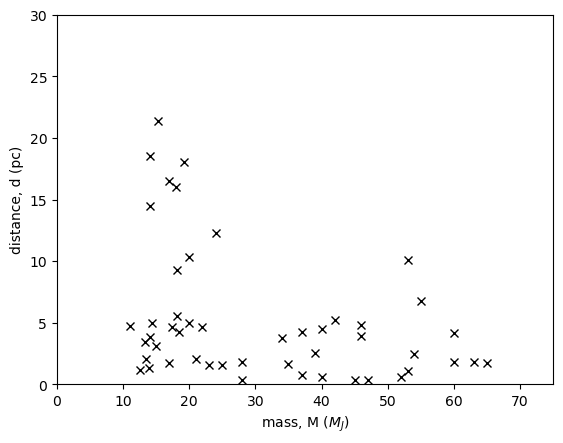

In [424]:
plt.figure()
plt.plot(BDs['mass_MJ'],BDs['distance_ly']/32.615,'kx')
plt.xlabel(r'mass, M ($M_J$)')
plt.ylabel(r'distance, d (pc)')
plt.xlim(0,75)
plt.ylim(0,30)
plt.show()

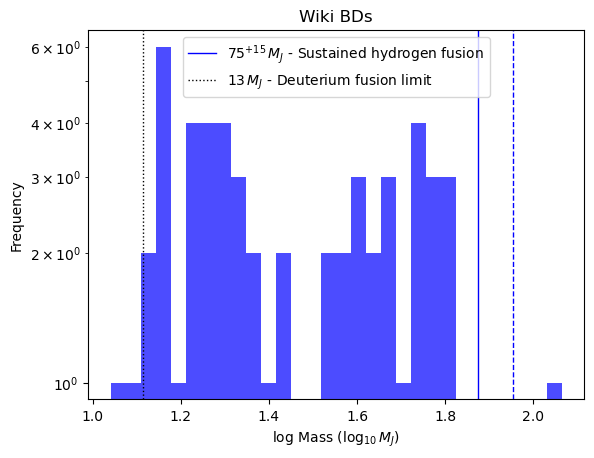

In [433]:
plt.hist(np.log10(BDs['mass_MJ']), bins=30, color='blue', alpha=0.7)
plt.title('Wiki BDs')
plt.xlabel(r'log Mass ($\log_{10}M_J$)')
plt.ylabel('Frequency')
plt.yscale('log')


plt.axvline(x=np.log10(75), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(90), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(13), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.legend()
plt.show()